# About Dataset

## 📔Author : Syed Muzamil Karim
 [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=flat&logo=github)](https://github.com/mozammilkarim)\
 [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=flat&logo=kaggle)](https://www.kaggle.com/muzammlkarim)\
 [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=flat&logo=linkedin)](https://www.linkedin.com/in/mozammilkarim/)

## Metadata 📄
    Amazon Products Sales Dataset 2023
        * Actually the dataset has nothing about sales, but only after products
Dataset link : <https://www.kaggle.com/datasets/shivamb/glassdoor-jobs-data/code>

    About
2021 - Data Related / ML Related / AI Sector Jobs on Linkedin and Glassdoor

  Includes information such as Company, Title, Industry, Revenue, Region.
* Information about columns

+ primary_ind: primary Industry
+ goc means regional job title or overall job category


## Aim/Objectives
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the Wrangling process, we will document our observations. Ultimately, we will produce a summary and draw insights from our findings.

# Importing all libraries

In [5]:
# load dataset from kaggle url
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !ls

In [6]:
df=pd.read_csv("/content/2021-ds-ml-jobs-glassdoor.csv")

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [8]:
df.columns

Index(['company', 'goc', 'job_title', 'primary_ind', 'sector_name', 'revenue',
       'size'],
      dtype='object')

In [9]:
df.describe()

,company,goc,job_title,primary_ind,sector_name,revenue,size
count,24030,24285,15245,24295,24299,19310,19310
unique,12255,1083,1811,505,161,103,69
top,BairesDev,other,Project Manager,unk,unk,Unknown / Non-Applicable,10000+ Employees
freq,199,9010,997,8908,8908,6561,5229


In [10]:
df.sample(3)

,company,goc,job_title,primary_ind,sector_name,revenue,size
9585,Multicare Egypt for Pharmaceutical Industries,other,NaN,unk,unk,Unknown / Non-Applicable,501 to 1000 Employees
12058,Blue Cross Blue Shield of Michigan,technical analyst,Technical Analyst,Insurance Carriers,Insurance,$10+ billion (USD),5001 to 10000 Employees
4904,University System of New Hampshire,project manager,Project Manager I,Colleges & Universities,Education,$500 million to $1 billion (USD),10000+ Employees


In [11]:
df.goc.value_counts().head(20)

goc
other                           9010
project manager                 1123
data scientist                   963
business analyst                 899
product manager                  847
data analyst                     787
data engineer                    730
database administrator           587
machine learning engineer        490
software engineer                455
research scientist               362
statistician                     158
engineer                         154
clinical research associate      145
research assistant               138
sql developer                    115
systems engineer                 114
construction project manager     109
database engineer                109
research engineer                105
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company      24030 non-null  object
 1   goc          24285 non-null  object
 2   job_title    15245 non-null  object
 3   primary_ind  24295 non-null  object
 4   sector_name  24299 non-null  object
 5   revenue      19310 non-null  object
 6   size         19310 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [13]:
df.duplicated().sum()

6243

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df[df.duplicated(keep=False)]

,company,goc,job_title,primary_ind,sector_name,revenue,size


In [16]:
df.columns

Index(['company', 'goc', 'job_title', 'primary_ind', 'sector_name', 'revenue',
       'size'],
      dtype='object')

In [17]:
df.isnull().sum().sort_values(ascending=False)

job_title      4492
revenue        3673
size           3673
company          27
goc              12
primary_ind       2
sector_name       0
dtype: int64

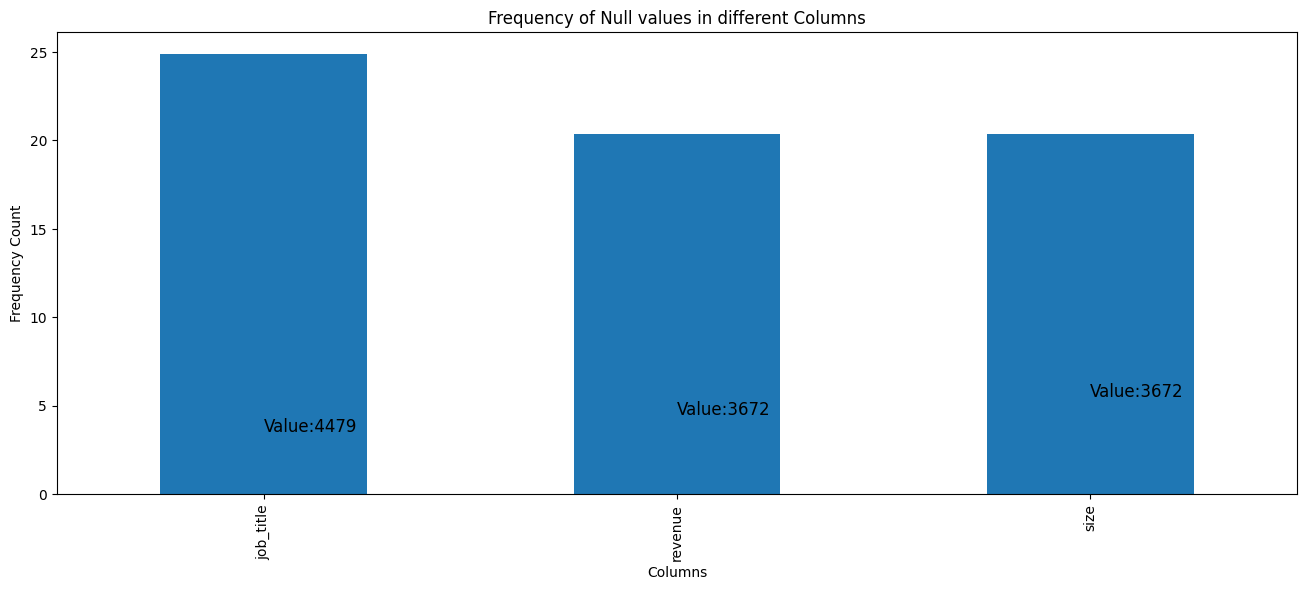

In [18]:
plt.figure(figsize=(16,6))
#plot the null values by their precentage, only if the null values are more than 1%
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_values=missing_values[missing_values>1].plot(kind='bar')
plt.text(0,3.5,"Value:4479",fontsize=12) # respective null values
plt.text(1,4.5,"Value:3672",fontsize=12)
plt.text(2,5.5,"Value:3672",fontsize=12)
plt.title("Frequency of Null values in different Columns")
plt.xlabel("Columns")
plt.ylabel("Frequency Count")
plt.show()

### 'company', 'revenue', 'job_title' and 'size', have missing values.   

dropping rows where goc and primary_ind have missing values as they are negligible

In [19]:
df.dropna(subset=["goc" , "primary_ind",'company' ],axis=0,inplace=True)

<Axes: >

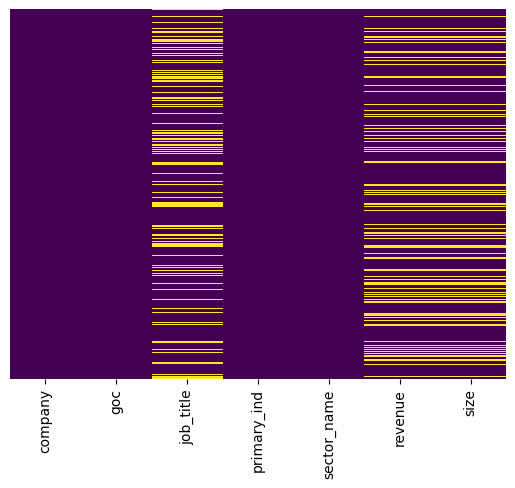

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Revenue and size column have similar/same missing values.

Deep diving into the revenue, size and job_title column

In [21]:
df[df["job_title"].isnull()].head()

,company,goc,job_title,primary_ind,sector_name,revenue,size
9,BjellCon,other,NaN,unk,unk,Unknown / Non-Applicable,Unknown
10,Citi,other,NaN,unk,unk,NaN,NaN
11,Planet,other,NaN,IT Service,Information Technology,Unknown / Non-Applicable,1001 to 5000 Employees
13,WireCo WorldGroup,other,NaN,Industrial Manufacturing,Manufacturing,$500 million to $1 billion (USD),1001 to 5000 Employees
14,OrangeLoops,other,NaN,unk,unk,Unknown / Non-Applicable,1 to 50 Employees


Replacing null values in revenue column with 'Unknown / Non-Applicable'  

In [22]:
df["revenue"].fillna('Unknown / Non-Applicable',inplace=True)

Replacing null values in size column with 'Unknown'  

In [23]:
df["size"].fillna('Unknown',inplace=True)

Replacing nan values of job title with 'Missing' keyword, since we can't impute them .

In [24]:
df["job_title"].fillna('Missing',inplace=True)

unk in primary_ind and sector_name means 'Unknown'
* They are missing at the same time

+  revenue and size are null in same records, they are highly correlated

In [25]:
df[df["primary_ind"]=='unk'].head()

,company,goc,job_title,primary_ind,sector_name,revenue,size
0,Alliance Automation,project manager,Project Manager,unk,unk,Unknown / Non-Applicable,Unknown
1,OPTX,data engineer,Senior Data Engineer,unk,unk,Unknown / Non-Applicable,Unknown
4,"M&K Renovations, LLC",project manager,Project Manager,unk,unk,Unknown / Non-Applicable,Unknown
6,Crimson Interactive (Enago),statistical analyst,Freelance Statistical Analyst,unk,unk,Unknown / Non-Applicable,201 to 500 Employees
9,BjellCon,other,Missing,unk,unk,Unknown / Non-Applicable,Unknown


In [26]:
df['size'].value_counts().head(20)

size
Unknown                         4638
10000+ Employees                3048
1001 to 5000 Employees          1634
51 to 200 Employees             1561
1 to 50 Employees               1443
201 to 500 Employees            1137
501 to 1000 Employees            867
5001 to 10000 Employees          774
MÃ¡s de 10Â 000 empleados        206
Mehr als 10.000 Mitarbeiter      144
Unbekannt                        140
51 bis 200 Mitarbeiter           106
10000+ medewerkers               106
1 bis 50 Mitarbeiter              80
Mais de 10.000 funcionÃ¡rios      74
1001 tot 5000 werknemers          74
Oltre 10.000 dipendenti           74
MÃ¡s de 10Â 000Â empleados        73
Onbekend                          73
1 tot 50 werknemers               71
Name: count, dtype: int64

In [27]:
df['revenue'].value_counts().head(10)

revenue
Unknown / Non-Applicable            8472
$10+ billion (USD)                  1673
$100 to $500 million (USD)          1005
$2 to $5 billion (USD)               685
$5 to $10 billion (USD)              555
$1 to $2 billion (USD)               452
$10 to $25 million (USD)             440
$500 million to $1 billion (USD)     417
Unbekannt/Nicht zutreffend           386
$50 to $100 million (USD)            360
Name: count, dtype: int64

In [28]:
df['primary_ind'].value_counts().head(20)

primary_ind
unk                                        6902
Staffing & Outsourcing                      701
Computer Hardware & Software                637
Internet                                    560
Enterprise Software & Network Solutions     477
IT Service                                  456
Consulting                                  403
Health Care Services & Hospitals            392
IT Services                                 339
Investment Banking & Asset Management       265
Biotech & Pharmaceuticals                   249
Colleges & Universities                     242
Industrial Manufacturing                    188
Advertising & Marketing                     183
Biotech & Pharmaceutical                    181
Aerospace & Defense                         180
Consumer Products Manufacturing             154
Electrical & Electronic Manufacturing       147
Construction                                144
Banks & Credit Unions                       141
Name: count, dtype: int64

In [29]:
df['sector_name'].value_counts().head(20)

sector_name
unk                                   6902
Information Technology                2305
Manufacturing                          951
Business Services                      944
Finance                                730
Business Service                       604
Health Care                            392
Retail                                 301
Education                              299
TecnologÃ­as de la informaciÃ³n        252
Biotech & Pharmaceuticals              249
Insurance                              201
Informationstechnologie                187
Telecommunications                     184
Biotech & Pharmaceutical               181
Aerospace & Defense                    180
Media                                  163
Construction, Repair & Maintenance     160
Government                             149
Transportation & Logistics             136
Name: count, dtype: int64

Now some insights

In [31]:
df.sample(3)

,company,goc,job_title,primary_ind,sector_name,revenue,size
10380,Commerzbank AG â Poland,database engineer,Database Engineer,Banks & Building Society,Finance,$10+ billion (USD),10000+ Employees
2388,Poly-Wood LLC,research engineer,Research Engineer,Miscellaneous Manufacturing,Manufacturing,$50 to $100 million (USD),201 to 500 Employees
19438,EBS Malaysia,risk analyst,Risk Analyst,unk,unk,Unknown / Non-Applicable,Unknown


In [53]:
# df.groupby('job_title')["job_title"].value_counts().sort_values(ascending=False).head(200)

Assuming all data science jobs contain the keyword 'data'

In [71]:

((df[df['job_title'].str.contains('data', case=False)]).shape[0]/len(df))*100

19.97224535109631

20% of all jobs belong to data science domain

In [77]:
ds_jobs=df[df['job_title'].str.contains('data', case=False)]

Most demanding jobs in the data science domain

In [81]:
ds_jobs.groupby(["job_title"])["job_title"].value_counts().sort_values(ascending=False).head(15)

job_title
Data Scientist                   710
Data Analyst                     622
Data Engineer                    522
Database Administrator           371
Senior Data Scientist            126
Senior Database Administrator    103
Senior Data Engineer              89
Database Engineer                 76
Senior Data Analyst               73
Junior Data Analyst               52
Data Scientist Intern             37
Junior Data Scientist             32
Data Analyst (H/F)                30
Junior Data Engineer              30
Data Scientist (H/F)              25
Name: count, dtype: int64

Type of companies involved in the datascience domain

* Top 10 companies giving maximum job openings

In [86]:
ds_jobs.groupby(["company"])["company"].value_counts().sort_values(ascending=False).head(10)

company
IBM                   14
McKinsey & Company    12
Accenture             12
UnitedHealth Group    11
Ally Financial        10
IKEA                   9
TikTok                 9
Vanguard               8
KPMG                   8
Deloitte               8
Name: count, dtype: int64

In [85]:
large_player_jobs_count=(ds_jobs.groupby(["company"])["company"].value_counts().sort_values(ascending=False).head(20).sum())
total_jobs=ds_jobs.__len__()
share_of_large_players=(large_player_jobs_count/total_jobs)*100
share_of_large_players


4.724847137298499

***Interesting observation is that, big companies don't have much jobs to offer. More than 95% of data science jobs are offered by small or micro companies.***

***Major sectors/Industries where data science is used***

In [87]:
ds_jobs.groupby(["primary_ind"])["primary_ind"].value_counts().sort_values(ascending=False).head(10)

primary_ind
unk                                        1007
Staffing & Outsourcing                      175
Internet                                    155
IT Services                                 129
Computer Hardware & Software                116
Health Care Services & Hospitals            105
Consulting                                  101
Enterprise Software & Network Solutions      95
IT Service                                   90
Investment Banking & Asset Management        90
Name: count, dtype: int64

In [88]:
ds_jobs.groupby(["sector_name"])["sector_name"].value_counts().sort_values(ascending=False).head(10)

sector_name
unk                                1007
Information Technology              548
Business Services                   266
Finance                             251
Manufacturing                       146
Health Care                         105
Business Service                     98
Retail                               75
Insurance                            73
TecnologÃ­as de la informaciÃ³n      67
Name: count, dtype: int64

Information Technology ,
Business Services      ,
Finance  ,
Manufacturing  ,
Health Care

In [94]:
# ds_jobs.groupby([["company_name","revenue"]])[["company_name","revenue"]].value_counts().sort_values(ascending=False).head(10)

In [90]:
ds_jobs.groupby(["size"])["size"].value_counts().sort_values(ascending=False).head(10)

size
10000+ Employees               744
Unknown                        574
1001 to 5000 Employees         341
51 to 200 Employees            319
1 to 50 Employees              301
201 to 500 Employees           241
501 to 1000 Employees          212
5001 to 10000 Employees        173
MÃ¡s de 10Â 000 empleados       51
Mehr als 10.000 Mitarbeiter     32
Name: count, dtype: int64